# Проект "Загадочная популяция в статье из Cancer Cell"

Проект выполнил Роман Глушак, студент 2 курса магистерской программы "Геномика и здоровье человека" Биологического факультета МГУ им. М.В.Ломоносова

Статья, на основе которой осуществлён проект:

Gay CM, Stewart CA, Park EM, Diao L, Groves SM, Heeke S, Nabet BY, Fujimoto J, Solis LM, Lu W, Xi Y, Cardnell RJ, Wang Q, Fabbri G, Cargill KR, Vokes NI, Ramkumar K, Zhang B, Della Corte CM, Robson P, Swisher SG, Roth JA, Glisson BS, Shames DS, Wistuba II, Wang J, Quaranta V, Minna J, Heymach JV, Byers LA. Patterns of transcription factor programs and immune pathway activation define four major subtypes of SCLC with distinct therapeutic vulnerabilities. Cancer Cell. 2021 Mar 8;39(3):346-360.e7. doi: 10.1016/j.ccell.2020.12.014. Epub 2021 Jan 21. PMID: 33482121; PMCID: PMC8143037.

https://www.sciencedirect.com/science/article/pii/S1535610820306620?via%3Dihub

# Часть 1. Воспроизведение анализа датасета из статьи

Ссылка на исходный датасет в GEO: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE138474

## 1. Установка R и Seurat

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("Seurat")

(as ‘lib’ is unspecified)



























































































































































































































































































































































































	‘/tmp/RtmppTBHFy/downloaded_packages’



In [ ]:
%%R
library(Seurat)



Attaching package: ‘SeuratObject’



    intersect




## 2. Загрузка датасетов

2.1. SC53

In [ ]:
import gdown
url = "https://drive.google.com/u/0/uc?id=1pVfj3BNkb1_Zg6CYlPRuTrUuyKz2N8qZ&export=download"
output = 'SC53.genes.tsv'
gdown.download(url, output)

import gdown
url = "https://drive.google.com/u/0/uc?id=13vAZldnKtQG3PqULSt3BUE_ktS_BOfYs&export=download"
output = 'SC53.barcodes.tsv'
gdown.download(url, output)

import gdown
url = "https://drive.google.com/u/0/uc?id=186qfEfXqc6NEbd9mPNRG4YyxiXuFwczD&export=download"
output = 'SC53.matrix.mtx'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/u/0/uc?id=1pVfj3BNkb1_Zg6CYlPRuTrUuyKz2N8qZ&export=download
To: /content/SC53.genes.tsv
100%|██████████| 1.35M/1.35M [00:00<00:00, 95.3MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=13vAZldnKtQG3PqULSt3BUE_ktS_BOfYs&export=download
To: /content/SC53.barcodes.tsv
100%|██████████| 123k/123k [00:00<00:00, 55.9MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=186qfEfXqc6NEbd9mPNRG4YyxiXuFwczD&export=download
To: /content/SC53.matrix.mtx
100%|██████████| 229M/229M [00:06<00:00, 36.5MB/s]


'SC53.matrix.mtx'

In [ ]:
!mkdir SC53
!mv SC53.* SC53

In [ ]:
!mv -v SC53/SC53.matrix.mtx SC53/matrix.mtx
!mv -v SC53/SC53.genes.tsv SC53/genes.tsv
!mv -v SC53/SC53.barcodes.tsv SC53/barcodes.tsv

renamed 'SC53/SC53.matrix.mtx' -> 'SC53/matrix.mtx'
renamed 'SC53/SC53.genes.tsv' -> 'SC53/genes.tsv'
renamed 'SC53/SC53.barcodes.tsv' -> 'SC53/barcodes.tsv'


2.2. SC53cis

In [ ]:
import gdown
url = "https://drive.google.com/u/0/uc?id=1P3hFykoc5Y_TInKiIExMPlH-HNNq7H1w&export=download"
output = 'SC53cis.genes.tsv'
gdown.download(url, output)

import gdown
url = "https://drive.google.com/u/0/uc?id=1IBlxIvr4wW1DJqR1n2Se19lEH0qZ7B4f&export=download"
output = 'SC53cis.barcodes.tsv'
gdown.download(url, output)

import gdown
url = "https://drive.google.com/u/0/uc?id=1rkmQpPerjr_Azcni4Vd5jdSXCxxTpxOi&export=download"
output = 'SC53cis.matrix.mtx'
gdown.download(url, output)


Downloading...
From: https://drive.google.com/u/0/uc?id=1P3hFykoc5Y_TInKiIExMPlH-HNNq7H1w&export=download
To: /content/SC53cis.genes.tsv
100%|██████████| 841k/841k [00:00<00:00, 90.4MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1IBlxIvr4wW1DJqR1n2Se19lEH0qZ7B4f&export=download
To: /content/SC53cis.barcodes.tsv
100%|██████████| 46.8k/46.8k [00:00<00:00, 9.34MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1rkmQpPerjr_Azcni4Vd5jdSXCxxTpxOi&export=download
To: /content/SC53cis.matrix.mtx
100%|██████████| 83.6M/83.6M [00:01<00:00, 68.4MB/s]


'SC53cis.matrix.mtx'

In [ ]:
!mkdir SC53cis
!mv SC53cis.* SC53cis

In [ ]:
!mv -v SC53cis/SC53cis.matrix.mtx SC53cis/matrix.mtx
!mv -v SC53cis/SC53cis.genes.tsv SC53cis/genes.tsv
!mv -v SC53cis/SC53cis.barcodes.tsv SC53cis/barcodes.tsv

renamed 'SC53cis/SC53cis.matrix.mtx' -> 'SC53cis/matrix.mtx'
renamed 'SC53cis/SC53cis.genes.tsv' -> 'SC53cis/genes.tsv'
renamed 'SC53cis/SC53cis.barcodes.tsv' -> 'SC53cis/barcodes.tsv'


## 3. Повторение процедур, указанных в статье

3.1. Загрузка матриц

In [ ]:
%%R
adj.matrix <- Read10X("SC53/")

adj.matrix1 <- Read10X("SC53cis/")

In [ ]:
%%R
srat <- CreateSeuratObject(adj.matrix)

srat1 <- CreateSeuratObject(adj.matrix1)

In [ ]:
%%R
adj.matrix <- NULL

adj.matrix1 <- NULL

3.2. Определение дублетов

In [ ]:
!pip install scanpy scrublet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 43.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=7a53849f576025050baa82c33307c1263de8d0aca6778d889ff7215fadc25787
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552450 sha256=cb0dc571da25d72dbf44d5b811ead

In [ ]:
import scanpy as sc
import scrublet as scr

adata = sc.read_10x_mtx('SC53/')

adata1 = sc.read_10x_mtx('SC53cis/')

adata.var_names_make_unique()

adata1.var_names_make_unique()

In [ ]:
scrub = scr.Scrublet(adata.X, expected_doublet_rate = 0.061)

scrub1 = scr.Scrublet(adata1.X, expected_doublet_rate = 0.061)

In [ ]:
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()

adata1.obs['doublet_scores'], adata1.obs['predicted_doublets'] = scrub1.scrub_doublets()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.54
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.2%
Overall doublet rate:
	Expected   = 6.1%
	Estimated  = 6.5%
Elapsed time: 14.5 seconds
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.39
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 18.4%
Overall doublet rate:
	Expected   = 6.1%
	Estimated  = 2.9%
Elapsed time: 4.4 seconds


In [ ]:
import pandas as pd

pd.DataFrame(adata.obs).to_csv("scrublet_calls.tsv",sep = '\t',header = False)

pd.DataFrame(adata1.obs).to_csv("scrublet_calls1.tsv",sep = '\t',header = False)

In [ ]:
%%R
doublets <- read.table("scrublet_calls.tsv",header = F,row.names = 1)
colnames(doublets) <- c("Doublet_score", "Is_doublet")
srat <- AddMetaData(srat,doublets)

doublets1 <- read.table("scrublet_calls1.tsv",header = F,row.names = 1)
colnames(doublets1) <- c("Doublet_score", "Is_doublet")
srat1 <- AddMetaData(srat1,doublets1)

3.3. Нормализация

In [ ]:
%%R
srat <- NormalizeData(srat)

srat1 <- NormalizeData(srat1)

3.4. Поиск вариабельных генов

In [ ]:
%%R
srat <- FindVariableFeatures(srat, selection.method = "vst", nfeatures = 2000)

srat1 <- FindVariableFeatures(srat1, selection.method = "vst", nfeatures = 2000)

3.5. Шкалирование

In [ ]:
%%R
all.genes <- rownames(srat)
srat <- ScaleData(srat, features = all.genes)

all1.genes <- rownames(srat1)
srat1 <- ScaleData(srat1, features = all1.genes)


  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |==                                                                    |   3%
  |                                                                            
  |====                                                                  |   6%
  |                                                                            
  |======                                                                |   9%
  |                                                                            
  |========                                                              |  12%
  |                                                                            
  |==========                                                            |  15%
  |                                    

3.6. Снижение размерности

In [ ]:
%%R
srat <- RunPCA(srat, features = VariableFeatures(object = srat))

srat1 <- RunPCA(srat1, features = VariableFeatures(object = srat1))

Positive:  PLCG2, ZNF90, AIF1, HLA-DRB1, GNGT2, HLA-DQA1, SGK1, LGALS3, VIM, CTSS 
	   AC132192.2, TGFB1, H3F3C, AC110285.6, AC015912.3, MMP14, BLVRB, IGF1, LINC01641, PSMB9 
	   Z93241.1, AC007952.4, AL137802.2, MTRNR2L8, CSKMT, AL355075.4, AC020765.2, IER5, CXCL14, GADD45B 
Negative:  HIST1H4C, NUCKS1, TOP2A, BIRC5, CENPW, CDKN3, CCDC34, TUBA1B, NUSAP1, UBE2C 
	   RHEB, HNRNPD, CDKN2D, CKS1B, RPL39L, DTYMK, TPX2, MAD2L1, MZT2B, HMGN2 
	   CENPF, PTTG1, PIMREG, SMC2, TUBA1C, RAD21, CALM2, TUBB2B, RAN, GTSE1 
PC_ 2 
Positive:  SEC11C, CCDC28B, GRP, TMCO3, LCN15, ESPL1, SLBP, CYBA, TMEM61, TPPP3 
	   SH3BGRL3, S100A6, GINS2, TMEM255B, SH3TC1, PCNA, QPCT, INO80E, MEG3, MIAT 
	   SCGN, DLK1, CDKN1A, CENPX, UNG, KRT7, CALML3, GYG1, ENO1, AGPAT2 
Negative:  CENPF, PLK1, UBE2C, CCNB1, BIRC5, TOP2A, CENPA, CCNB2, CKS1B, CDKN3 
	   TPX2, PTTG1, PIMREG, ASPM, MAD2L1, DLGAP5, KPNA2, GTSE1, PBK, CDCA8 
	   KIF2C, NEK2, KNSTRN, CCNA2, PSRC1, NUSAP1, RACGAP1, GPSM2, HMMR, ARL6IP1 
PC_ 3 
Positive: 

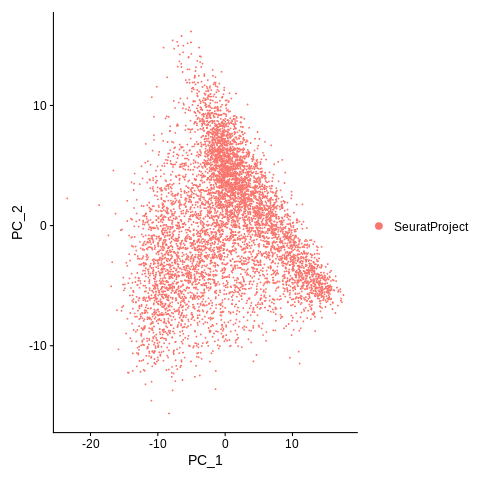

In [ ]:
%%R
DimPlot(srat, reduction = "pca")

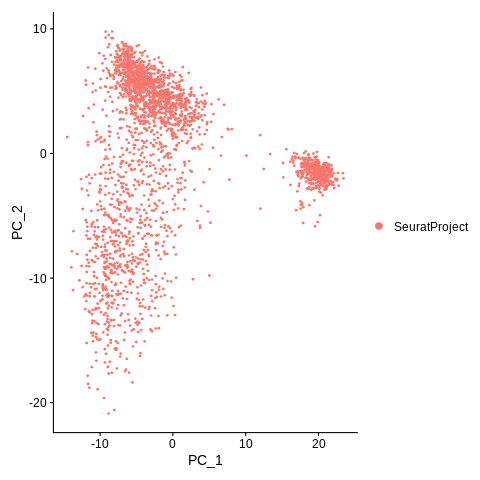

In [ ]:
%%R
DimPlot(srat1, reduction = "pca")

3.7. Кластеризация

In [ ]:
%%R
srat <- FindNeighbors(srat, dims = 1:10)

srat1 <- FindNeighbors(srat1, dims = 1:10)

In [ ]:
%%R
srat <- FindClusters(srat, resolution = 0.6)

srat1 <- FindClusters(srat1, resolution = 0.6)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6493
Number of edges: 207482

Running Louvain algorithm...


Maximum modularity in 10 random starts: 0.8422
Number of communities: 11
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2465
Number of edges: 81194

Running Louvain algorithm...


Maximum modularity in 10 random starts: 0.8398
Number of communities: 9
Elapsed time: 0 seconds


3.8. Визуализация

In [ ]:
%%R
srat <- RunTSNE(srat, dims = 1:10, verbose = F, perplexity = 30)

srat1 <- RunTSNE(srat1, dims = 1:10, verbose = F, perplexity = 30)

Визуализация из статьи:

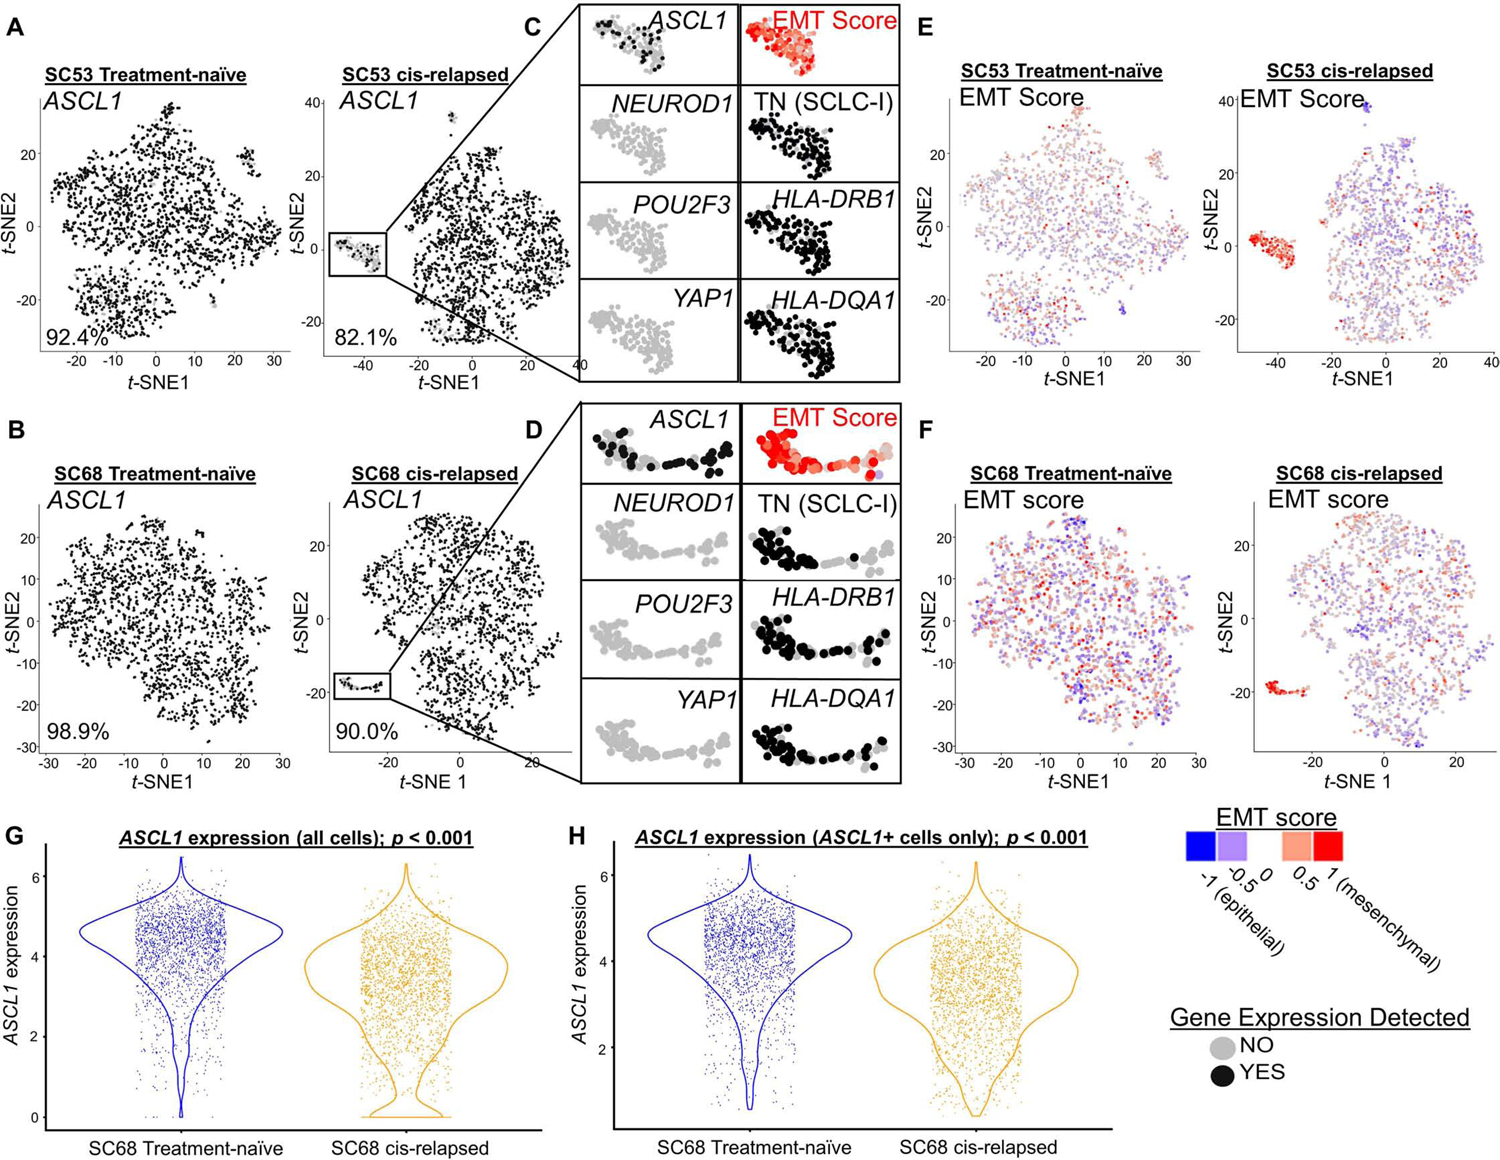

SC53 treatment-naive:

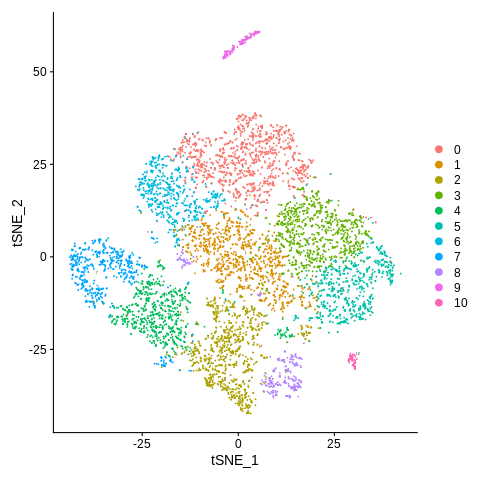

In [ ]:
%%R
DimPlot(srat,label.size = 1,repel = T,label = T)

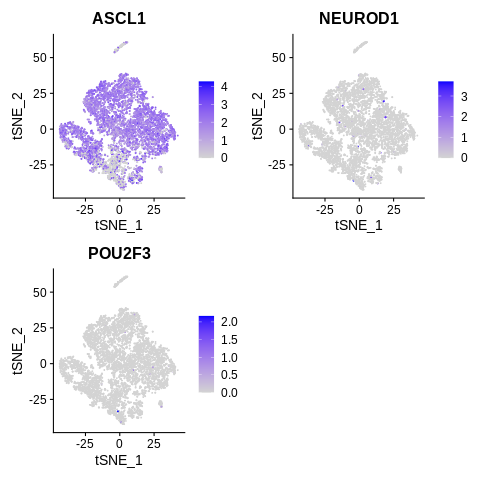

In [ ]:
%%R
FeaturePlot(srat, features = c("ASCL1","NEUROD1","POU2F3"))

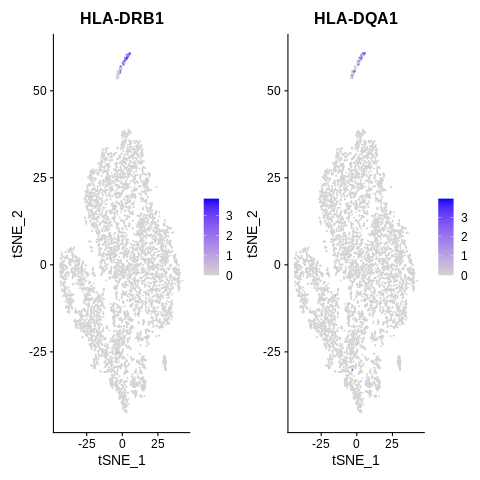

In [ ]:
%%R
FeaturePlot(srat, features = c("HLA-DRB1", "HLA-DQA1"))

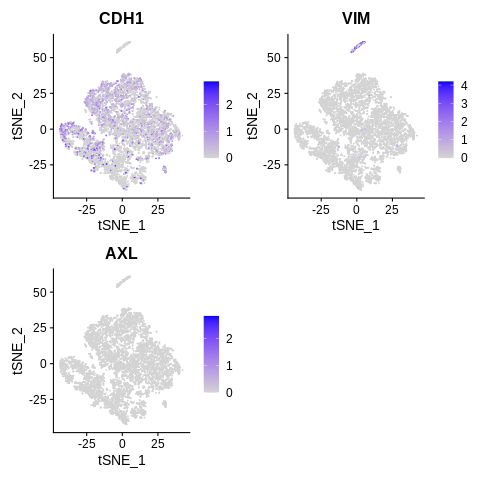

In [ ]:
%%R
FeaturePlot(srat, features = c("CDH1", "VIM", "AXL"))

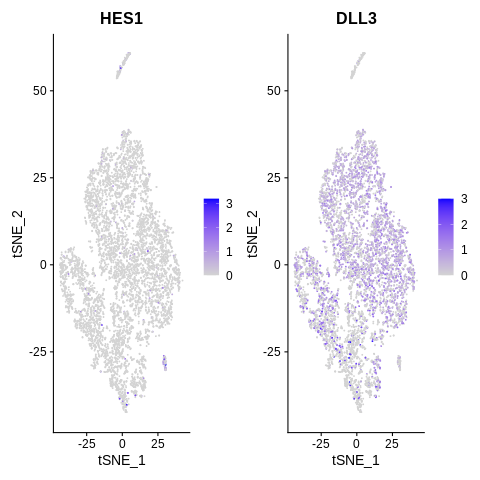

In [ ]:
%%R
FeaturePlot(srat, features = c("HES1", "DLL3"))

SC53 cis-relapsed:

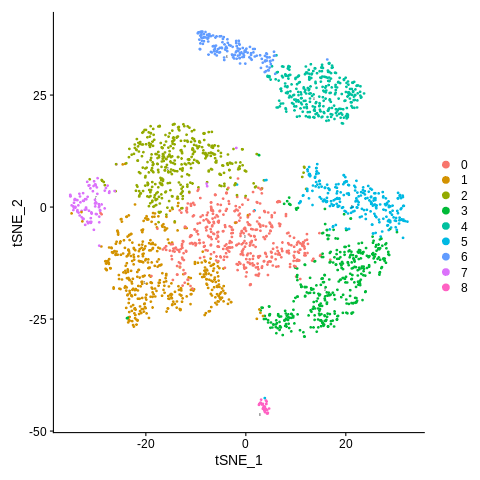

In [ ]:
%%R
DimPlot(srat1,label.size = 1,repel = T,label = T)

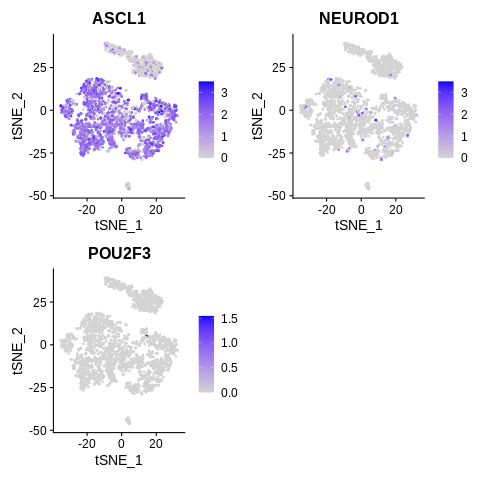

In [ ]:
%%R
FeaturePlot(srat1, features = c("ASCL1", "NEUROD1", "POU2F3"))


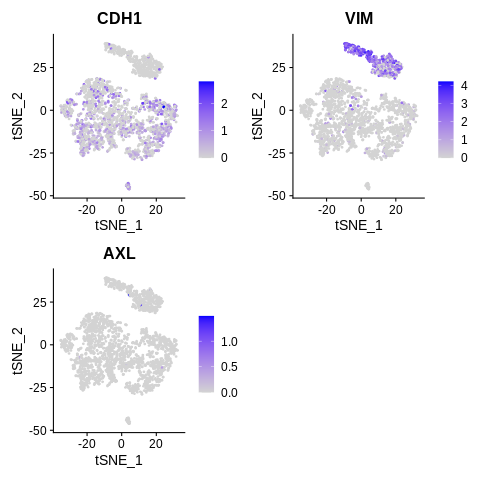

In [ ]:
%%R
FeaturePlot(srat1, features = c("CDH1", "VIM","AXL"))

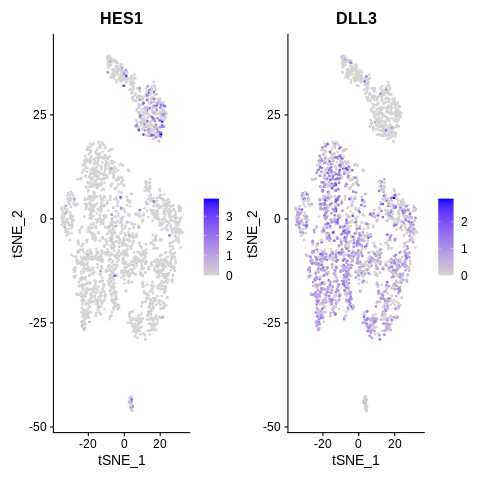

In [ ]:
%%R
FeaturePlot(srat1, features = c("HES1", "DLL3"))

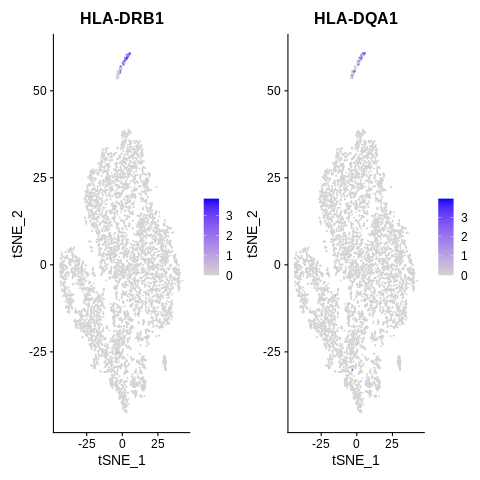

In [ ]:
%%R
FeaturePlot(srat, features = c("HLA-DRB1", "HLA-DQA1"))

# Часть 2. Псевдовыравнивание чтений на человеческий и мышиный референсы с помощью kallisto (kb count)

## 1. Установка пакетов

In [ ]:
!pip install kb-python

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

## 2. Загрузка референсов

2.1. Референсные геномы (FASTA)

In [ ]:
!wget -O human_dna.fa.gz https://ftp.ensembl.org/pub/release-110/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz

In [ ]:
!wget -O mouse_dna.fa.gz https://ftp.ensembl.org/pub/release-110/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.primary_assembly.fa.gz

2.2. Референсные аннотации (GTF)

In [ ]:
!wget -O human.gtf.gz https://ftp.ensembl.org/pub/release-110/gtf/homo_sapiens/Homo_sapiens.GRCh38.110.gtf.gz

--2023-12-20 22:07:41--  https://ftp.ensembl.org/pub/release-110/gtf/homo_sapiens/Homo_sapiens.GRCh38.110.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54325732 (52M) [application/x-gzip]
Saving to: ‘human.gtf.gz’

human.gtf.gz        100%[===================>]  51.81M   458KB/s    in 1m 57s  

2023-12-20 22:09:38 (454 KB/s) - ‘human.gtf.gz’ saved [54325732/54325732]



In [ ]:
!wget -O mouse.gtf.gz https://ftp.ensembl.org/pub/release-110/gtf/mus_musculus/Mus_musculus.GRCm39.110.gtf.gz

--2023-12-20 22:09:40--  https://ftp.ensembl.org/pub/release-110/gtf/mus_musculus/Mus_musculus.GRCm39.110.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32302884 (31M) [application/x-gzip]
Saving to: ‘mouse.gtf.gz’

mouse.gtf.gz        100%[===================>]  30.81M   455KB/s    in 70s     

2023-12-20 22:10:50 (453 KB/s) - ‘mouse.gtf.gz’ saved [32302884/32302884]



## 3. Загрузка чтений

In [ ]:
!conda install -c bioconda sra-tools --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [ ]:
!prefetch SRR10230462
!fasterq-dump SRR10230462
!rm -r SRR10230462


2023-12-20T22:57:58 prefetch.2.10.0: 1) Downloading 'SRR10230462'...
2023-12-20T22:57:58 prefetch.2.10.0:  Downloading via https...
2023-12-20T22:59:00 prefetch.2.10.0:  https download succeed
2023-12-20T22:59:00 prefetch.2.10.0: 1) 'SRR10230462' was downloaded successfully
2023-12-20T22:59:00 prefetch.2.10.0: 'SRR10230462' has 0 unresolved dependencies
2023-12-20T22:59:00 fasterq-dump.2.10.0 err: fasterq-dump.c fastdump_csra() checking ouput-file 'SRR10230462.fastq' -> RC(rcExe,rcFile,rcPacking,rcName,rcExists)


In [ ]:
!prefetch SRR10230463
!fasterq-dump SRR10230463
!rm -r SRR10230463


2023-12-20T22:23:42 prefetch.2.10.0: 1) Downloading 'SRR10230463'...
2023-12-20T22:23:42 prefetch.2.10.0:  Downloading via https...
2023-12-20T22:24:54 prefetch.2.10.0:  https download succeed
2023-12-20T22:24:54 prefetch.2.10.0: 1) 'SRR10230463' was downloaded successfully
2023-12-20T22:24:54 prefetch.2.10.0: 'SRR10230463' has 0 unresolved dependencies
spots read      : 33,897,963
reads read      : 67,795,926
reads written   : 67,795,926


In [ ]:
!prefetch SRR10230464
!fasterq-dump SRR10230464
!rm -r SRR10230464


2023-12-20T22:34:23 prefetch.2.10.0: 1) Downloading 'SRR10230464'...
2023-12-20T22:34:23 prefetch.2.10.0:  Downloading via https...
2023-12-20T22:35:55 prefetch.2.10.0:  https download succeed
2023-12-20T22:35:55 prefetch.2.10.0: 1) 'SRR10230464' was downloaded successfully
2023-12-20T22:35:55 prefetch.2.10.0: 'SRR10230464' has 0 unresolved dependencies
spots read      : 43,354,943
reads read      : 86,709,886
reads written   : 86,709,886


## 4. Индексирование референсов

In [ ]:
!kb ref -i human_ind.idx -g t2g_h.txt --overwrite -f1 human_tr.fa.gz human_dna.fa.gz human.gtf.gz

[2023-12-20 23:55:47,116]    INFO [ref] Preparing human_dna.fa.gz, human.gtf.gz
[2023-12-20 23:57:45,948]    INFO [ref] Splitting genome human_dna.fa.gz into cDNA at /content/tmp/tmpzo85qbkh
[2023-12-21 00:00:15,471]    INFO [ref] Concatenating 1 cDNAs to human_tr.fa.gz
[2023-12-21 00:00:26,308]    INFO [ref] Creating transcript-to-gene mapping at t2g_h.txt
[2023-12-21 00:00:29,824]    INFO [ref] Indexing human_tr.fa.gz to human_ind.idx


In [ ]:
!kb ref -i mouse_ind.idx -g t2g_m.txt -f1 mouse_tr.fa.gz mouse_dna.fa.gz mouse.gtf.gz

[2023-12-21 00:48:06,112]    INFO [ref] Preparing mouse_dna.fa.gz, mouse.gtf.gz
[2023-12-21 00:49:13,168]    INFO [ref] Splitting genome mouse_dna.fa.gz into cDNA at /content/tmp/tmpnn0q14yv
[2023-12-21 00:50:53,093]    INFO [ref] Concatenating 1 cDNAs to mouse_tr.fa.gz
[2023-12-21 00:50:55,831]    INFO [ref] Creating transcript-to-gene mapping at t2g_m.txt
[2023-12-21 00:50:58,256]    INFO [ref] Indexing mouse_tr.fa.gz to mouse_ind.idx


## 5. kb count

5.1. Человек (Homo sapiens)

In [ ]:
!kb count -i human_ind.idx -g t2g_h.txt --overwrite --em --h5ad -o ./62h -x 10xv2 SRR10230462_1.fastq SRR10230462_2.fastq

[2023-12-21 01:29:53,778]    INFO [count] Using index human_ind.idx to generate BUS file to ./62h from
[2023-12-21 01:29:53,778]    INFO [count]         SRR10230462_1.fastq
[2023-12-21 01:29:53,778]    INFO [count]         SRR10230462_2.fastq
[2023-12-21 01:44:54,403]    INFO [count] Sorting BUS file ./62h/output.bus to ./62h/tmp/output.s.bus
[2023-12-21 01:45:10,356]    INFO [count] On-list not provided
[2023-12-21 01:45:10,356]    INFO [count] Copying pre-packaged 10XV2 on-list to ./62h
[2023-12-21 01:45:10,490]    INFO [count] Inspecting BUS file ./62h/tmp/output.s.bus
[2023-12-21 01:45:16,406]    INFO [count] Correcting BUS records in ./62h/tmp/output.s.bus to ./62h/tmp/output.s.c.bus with on-list ./62h/10x_version2_whitelist.txt
[2023-12-21 01:45:22,018]    INFO [count] Sorting BUS file ./62h/tmp/output.s.c.bus to ./62h/output.unfiltered.bus
[2023-12-21 01:45:24,824]    INFO [count] Generating count matrix ./62h/counts_unfiltered/cells_x_genes from BUS file ./62h/output.unfiltered

In [ ]:
!kb count -i human_ind.idx -g t2g_h.txt --overwrite --em --h5ad -o ./63h -x 10xv2 SRR10230463_1.fastq SRR10230463_2.fastq

[2023-12-21 01:48:03,605]    INFO [count] Using index human_ind.idx to generate BUS file to ./63h from
[2023-12-21 01:48:03,605]    INFO [count]         SRR10230463_1.fastq
[2023-12-21 01:48:03,605]    INFO [count]         SRR10230463_2.fastq
[2023-12-21 02:03:00,134]    INFO [count] Sorting BUS file ./63h/output.bus to ./63h/tmp/output.s.bus
[2023-12-21 02:03:16,372]    INFO [count] On-list not provided
[2023-12-21 02:03:16,373]    INFO [count] Copying pre-packaged 10XV2 on-list to ./63h
[2023-12-21 02:03:16,520]    INFO [count] Inspecting BUS file ./63h/tmp/output.s.bus
[2023-12-21 02:03:22,134]    INFO [count] Correcting BUS records in ./63h/tmp/output.s.bus to ./63h/tmp/output.s.c.bus with on-list ./63h/10x_version2_whitelist.txt
[2023-12-21 02:03:31,578]    INFO [count] Sorting BUS file ./63h/tmp/output.s.c.bus to ./63h/output.unfiltered.bus
[2023-12-21 02:03:37,924]    INFO [count] Generating count matrix ./63h/counts_unfiltered/cells_x_genes from BUS file ./63h/output.unfiltered

In [ ]:
!kb count -i human_ind.idx -g t2g_h.txt --overwrite --em --h5ad -o ./64h -x 10xv2 SRR10230464_1.fastq SRR10230464_2.fastq

[2023-12-21 02:12:31,108]    INFO [count] Using index human_ind.idx to generate BUS file to ./64h from
[2023-12-21 02:12:31,108]    INFO [count]         SRR10230464_1.fastq
[2023-12-21 02:12:31,108]    INFO [count]         SRR10230464_2.fastq
[2023-12-21 02:29:49,475]    INFO [count] Sorting BUS file ./64h/output.bus to ./64h/tmp/output.s.bus
[2023-12-21 02:30:16,252]    INFO [count] On-list not provided
[2023-12-21 02:30:16,253]    INFO [count] Copying pre-packaged 10XV2 on-list to ./64h
[2023-12-21 02:30:16,361]    INFO [count] Inspecting BUS file ./64h/tmp/output.s.bus
[2023-12-21 02:30:30,754]    INFO [count] Correcting BUS records in ./64h/tmp/output.s.bus to ./64h/tmp/output.s.c.bus with on-list ./64h/10x_version2_whitelist.txt
[2023-12-21 02:30:37,570]    INFO [count] Sorting BUS file ./64h/tmp/output.s.c.bus to ./64h/output.unfiltered.bus
[2023-12-21 02:30:42,888]    INFO [count] Generating count matrix ./64h/counts_unfiltered/cells_x_genes from BUS file ./64h/output.unfiltered

5.2. Мышь (Mus musculus)

In [ ]:
!kb count -i mouse_ind.idx -g t2g_m.txt --overwrite --em --h5ad -o ./62m -x 10xv2 SRR10230462_1.fastq SRR10230462_2.fastq

[2023-12-21 02:33:58,724]    INFO [count] Using index mouse_ind.idx to generate BUS file to ./62m from
[2023-12-21 02:33:58,724]    INFO [count]         SRR10230462_1.fastq
[2023-12-21 02:33:58,724]    INFO [count]         SRR10230462_2.fastq
[2023-12-21 02:50:46,228]    INFO [count] Sorting BUS file ./62m/output.bus to ./62m/tmp/output.s.bus
[2023-12-21 02:50:51,147]    INFO [count] On-list not provided
[2023-12-21 02:50:51,147]    INFO [count] Copying pre-packaged 10XV2 on-list to ./62m
[2023-12-21 02:50:51,259]    INFO [count] Inspecting BUS file ./62m/tmp/output.s.bus
[2023-12-21 02:50:53,865]    INFO [count] Correcting BUS records in ./62m/tmp/output.s.bus to ./62m/tmp/output.s.c.bus with on-list ./62m/10x_version2_whitelist.txt
[2023-12-21 02:50:57,379]    INFO [count] Sorting BUS file ./62m/tmp/output.s.c.bus to ./62m/output.unfiltered.bus
[2023-12-21 02:50:59,884]    INFO [count] Generating count matrix ./62m/counts_unfiltered/cells_x_genes from BUS file ./62m/output.unfiltered

In [ ]:
!kb count -i mouse_ind.idx -g t2g_m.txt --overwrite --em --h5ad -o ./63m -x 10xv2 SRR10230463_1.fastq SRR10230463_2.fastq

[2023-12-21 02:56:51,149]    INFO [count] Using index mouse_ind.idx to generate BUS file to ./63m from
[2023-12-21 02:56:51,149]    INFO [count]         SRR10230463_1.fastq
[2023-12-21 02:56:51,149]    INFO [count]         SRR10230463_2.fastq
[2023-12-21 03:13:22,223]    INFO [count] Sorting BUS file ./63m/output.bus to ./63m/tmp/output.s.bus
[2023-12-21 03:13:26,641]    INFO [count] On-list not provided
[2023-12-21 03:13:26,641]    INFO [count] Copying pre-packaged 10XV2 on-list to ./63m
[2023-12-21 03:13:26,751]    INFO [count] Inspecting BUS file ./63m/tmp/output.s.bus
[2023-12-21 03:13:29,457]    INFO [count] Correcting BUS records in ./63m/tmp/output.s.bus to ./63m/tmp/output.s.c.bus with on-list ./63m/10x_version2_whitelist.txt
[2023-12-21 03:13:32,564]    INFO [count] Sorting BUS file ./63m/tmp/output.s.c.bus to ./63m/output.unfiltered.bus
[2023-12-21 03:13:35,675]    INFO [count] Generating count matrix ./63m/counts_unfiltered/cells_x_genes from BUS file ./63m/output.unfiltered

In [ ]:
!kb count -i mouse_ind.idx -g t2g_m.txt --overwrite --em --h5ad -o ./64m -x 10xv2 SRR10230464_1.fastq SRR10230464_2.fastq

[2023-12-21 03:13:50,322]    INFO [count] Using index mouse_ind.idx to generate BUS file to ./64m from
[2023-12-21 03:13:50,322]    INFO [count]         SRR10230464_1.fastq
[2023-12-21 03:13:50,322]    INFO [count]         SRR10230464_2.fastq
[2023-12-21 03:34:56,959]    INFO [count] Sorting BUS file ./64m/output.bus to ./64m/tmp/output.s.bus
[2023-12-21 03:35:01,777]    INFO [count] On-list not provided
[2023-12-21 03:35:01,777]    INFO [count] Copying pre-packaged 10XV2 on-list to ./64m
[2023-12-21 03:35:01,897]    INFO [count] Inspecting BUS file ./64m/tmp/output.s.bus
[2023-12-21 03:35:05,007]    INFO [count] Correcting BUS records in ./64m/tmp/output.s.bus to ./64m/tmp/output.s.c.bus with on-list ./64m/10x_version2_whitelist.txt
[2023-12-21 03:35:08,614]    INFO [count] Sorting BUS file ./64m/tmp/output.s.c.bus to ./64m/output.unfiltered.bus
[2023-12-21 03:35:11,126]    INFO [count] Generating count matrix ./64m/counts_unfiltered/cells_x_genes from BUS file ./64m/output.unfiltered

## 6. Анализ результатов kb count

### 6.1. Подсчет числа генов

6.1.1. Человек (Homo sapiens)

In [ ]:
with open(r"./62h/counts_unfiltered/cells_x_genes.genes.txt", 'r') as fp:
    lines = len(fp.readlines())
    print('Total Number of genes in SRR10230462:', lines)

Total Number of genes: 62754


In [ ]:
with open(r"./63h/counts_unfiltered/cells_x_genes.genes.txt", 'r') as fp:
    lines = len(fp.readlines())
    print('Total Number of genes in SRR10230463:', lines)

Total Number of genes: 62754


In [ ]:
with open(r"./64h/counts_unfiltered/cells_x_genes.genes.txt", 'r') as fp:
    lines = len(fp.readlines())
    print('Total Number of genes in SRR10230464:', lines)

Total Number of genes: 62754


6.1.2. Мышь (Mus musculus)

In [ ]:
with open(r"./62m/counts_unfiltered/cells_x_genes.genes.txt", 'r') as fp:
    lines = len(fp.readlines())
    print('Total Number of genes in SRR10230462:', lines)

Total Number of genes: 56941


In [ ]:
with open(r"./63m/counts_unfiltered/cells_x_genes.genes.txt", 'r') as fp:
    lines = len(fp.readlines())
    print('Total Number of genes in SRR10230463:', lines)

Total Number of genes: 56941


In [ ]:
with open(r"./64m/counts_unfiltered/cells_x_genes.genes.txt", 'r') as fp:
    lines = len(fp.readlines())
    print('Total Number of genes in SRR10230464:', lines)

Total Number of genes: 56941


### 6.2. Статистика запуска kb count

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

6.2.1. SRR10230462

In [ ]:
with open('62m/run_info.json') as f:
    m_62 = f.read()
print(m_62)

{
	"n_targets": 149547,
	"n_bootstraps": 0,
	"n_processed": 33328814,
	"n_pseudoaligned": 3462678,
	"n_unique": 1080786,
	"p_pseudoaligned": 10.4,
	"p_unique": 3.2,
	"kallisto_version": "0.50.1",
	"index_version": 13,
	"start_time": "Thu Dec 21 02:33:58 2023",
	"call": "/usr/local/lib/python3.10/dist-packages/kb_python/bins/linux/kallisto/kallisto bus -i mouse_ind.idx -o ./62m -x 10xv2 -t 8 SRR10230462_1.fastq SRR10230462_2.fastq"
}



In [ ]:
with open('62h/run_info.json') as f:
    h_62 = f.read()
print(h_62)

{
	"n_targets": 252894,
	"n_bootstraps": 0,
	"n_processed": 33328814,
	"n_pseudoaligned": 19512848,
	"n_unique": 5175162,
	"p_pseudoaligned": 58.5,
	"p_unique": 15.5,
	"kallisto_version": "0.50.1",
	"index_version": 13,
	"start_time": "Thu Dec 21 01:29:53 2023",
	"call": "/usr/local/lib/python3.10/dist-packages/kb_python/bins/linux/kallisto/kallisto bus -i human_ind.idx -o ./62h -x 10xv2 -t 8 SRR10230462_1.fastq SRR10230462_2.fastq"
}



<BarContainer object of 4 artists>

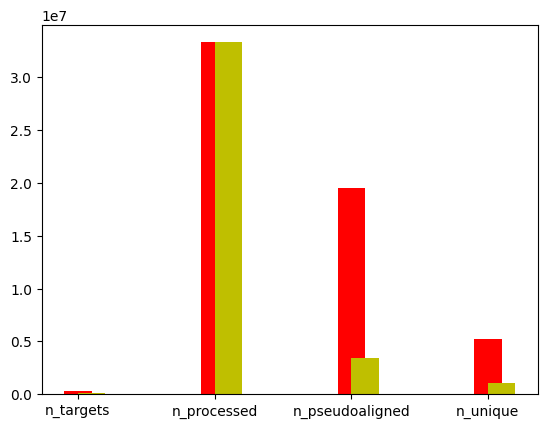

In [ ]:
df1 = pd.read_json('62h/run_info.json', orient ='index')
df1= df1[0:5]
df1 = df1.drop("n_bootstraps", axis=0)

df2 = pd.read_json('62m/run_info.json', orient ='index')
df2= df2[0:5]
df2 = df2.drop("n_bootstraps", axis=0)

X = df1.index
y = df1.iloc[:,0]
z = df2.iloc[:,0]

ax = plt.subplot()
plt.subplots_adjust()
ax.bar(X, y, color='r', width=0.2, align='center')
ax.bar(X, z, color='y', width=0.2, align='edge')

6.2.2. SRR10230463

In [ ]:
with open('63m/run_info.json') as f:
    m_63 = f.read()
print(m_63)

{
	"n_targets": 149547,
	"n_bootstraps": 0,
	"n_processed": 33897963,
	"n_pseudoaligned": 4298520,
	"n_unique": 1351060,
	"p_pseudoaligned": 12.7,
	"p_unique": 4.0,
	"kallisto_version": "0.50.1",
	"index_version": 13,
	"start_time": "Thu Dec 21 02:56:51 2023",
	"call": "/usr/local/lib/python3.10/dist-packages/kb_python/bins/linux/kallisto/kallisto bus -i mouse_ind.idx -o ./63m -x 10xv2 -t 8 SRR10230463_1.fastq SRR10230463_2.fastq"
}



In [ ]:
with open('63h/run_info.json') as f:
    h_63 = f.read()
print(h_63)

{
	"n_targets": 252894,
	"n_bootstraps": 0,
	"n_processed": 33897963,
	"n_pseudoaligned": 20883844,
	"n_unique": 5423425,
	"p_pseudoaligned": 61.6,
	"p_unique": 16.0,
	"kallisto_version": "0.50.1",
	"index_version": 13,
	"start_time": "Thu Dec 21 01:48:03 2023",
	"call": "/usr/local/lib/python3.10/dist-packages/kb_python/bins/linux/kallisto/kallisto bus -i human_ind.idx -o ./63h -x 10xv2 -t 8 SRR10230463_1.fastq SRR10230463_2.fastq"
}



<BarContainer object of 4 artists>

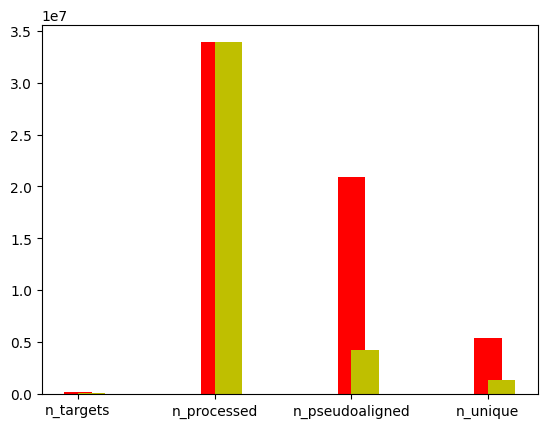

In [ ]:
df1 = pd.read_json('63h/run_info.json', orient ='index')
df1= df1[0:5]
df1 = df1.drop("n_bootstraps", axis=0)

df2 = pd.read_json('63m/run_info.json', orient ='index')
df2= df2[0:5]
df2 = df2.drop("n_bootstraps", axis=0)

X = df1.index
y = df1.iloc[:,0]
z = df2.iloc[:,0]

ax = plt.subplot()
plt.subplots_adjust()
ax.bar(X, y, color='r', width=0.2, align='center')
ax.bar(X, z, color='y', width=0.2, align='edge')

6.2.3. SRR10230464

In [ ]:
with open('64m/run_info.json') as f:
    m_64 = f.read()
print(m_64)

{
	"n_targets": 149547,
	"n_bootstraps": 0,
	"n_processed": 43354943,
	"n_pseudoaligned": 6374264,
	"n_unique": 1740363,
	"p_pseudoaligned": 14.7,
	"p_unique": 4.0,
	"kallisto_version": "0.50.1",
	"index_version": 13,
	"start_time": "Thu Dec 21 03:13:50 2023",
	"call": "/usr/local/lib/python3.10/dist-packages/kb_python/bins/linux/kallisto/kallisto bus -i mouse_ind.idx -o ./64m -x 10xv2 -t 8 SRR10230464_1.fastq SRR10230464_2.fastq"
}



In [ ]:
with open('64h/run_info.json') as f:
    h_64 = f.read()
print(h_64)

{
	"n_targets": 252894,
	"n_bootstraps": 0,
	"n_processed": 43354943,
	"n_pseudoaligned": 35035357,
	"n_unique": 7046025,
	"p_pseudoaligned": 80.8,
	"p_unique": 16.3,
	"kallisto_version": "0.50.1",
	"index_version": 13,
	"start_time": "Thu Dec 21 02:12:31 2023",
	"call": "/usr/local/lib/python3.10/dist-packages/kb_python/bins/linux/kallisto/kallisto bus -i human_ind.idx -o ./64h -x 10xv2 -t 8 SRR10230464_1.fastq SRR10230464_2.fastq"
}



<BarContainer object of 4 artists>

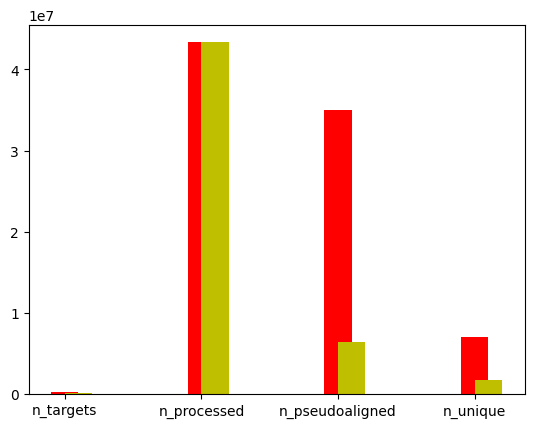

In [ ]:
df1 = pd.read_json('64h/run_info.json', orient ='index')
df1= df1[0:5]
df1 = df1.drop("n_bootstraps", axis=0)

df2 = pd.read_json('64m/run_info.json', orient ='index')
df2= df2[0:5]
df2 = df2.drop("n_bootstraps", axis=0)

X = df1.index
y = df1.iloc[:,0]
z = df2.iloc[:,0]

ax = plt.subplot()
plt.subplots_adjust()
ax.bar(X, y, color='r', width=0.2, align='center')
ax.bar(X, z, color='y', width=0.2, align='edge')

### 6.3. Number of genes by counts

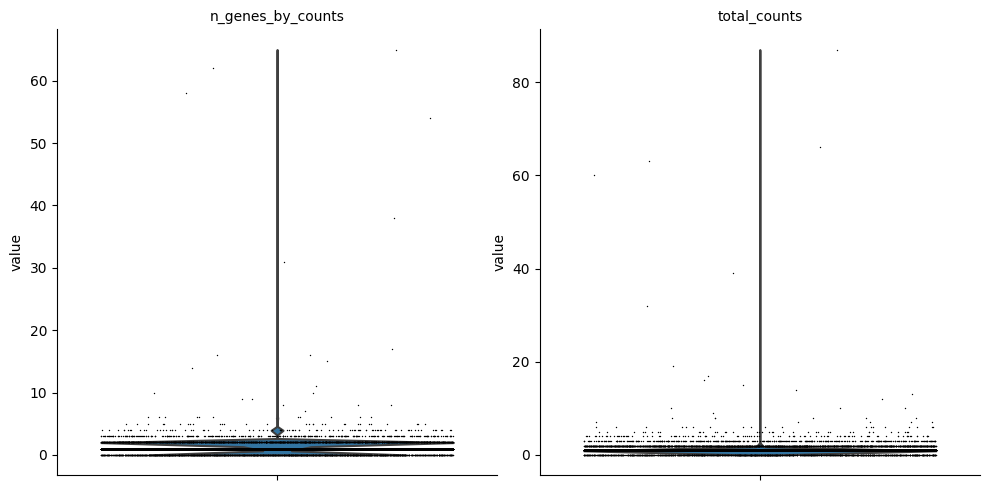

In [ ]:
adata_62h = sc.read_h5ad("62h/counts_unfiltered/adata.h5ad")
adata_62h.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata_62h, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata_62h, ["n_genes_by_counts",	"total_counts"], jitter=0.4, multi_panel=True)

<Axes: ylabel='Count'>

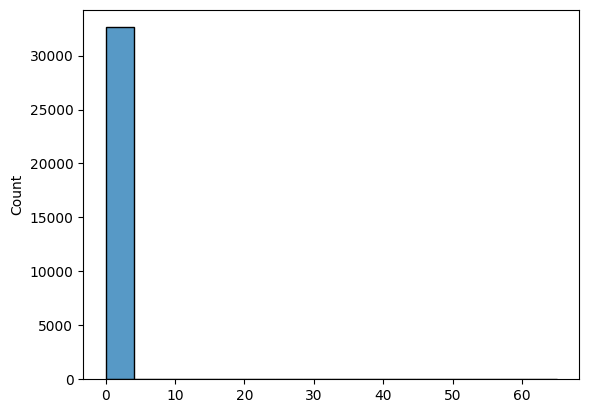

In [ ]:
genes_per_cell_62h = (adata_62h.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell_62h)

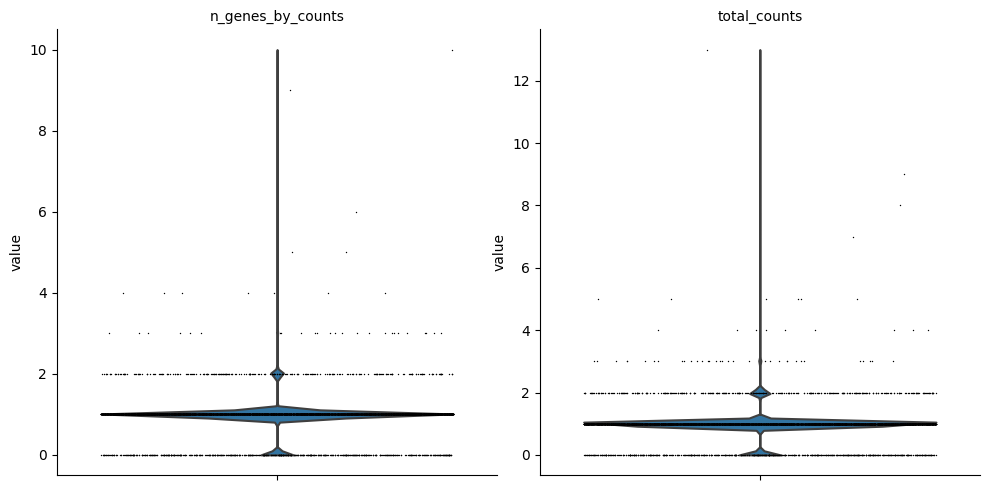

In [ ]:
adata_62m = sc.read_h5ad("62m/counts_unfiltered/adata.h5ad")
adata_62m.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata_62m, percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata_62m, ["n_genes_by_counts",	"total_counts"], jitter=0.4, multi_panel=True)

<Axes: ylabel='Count'>

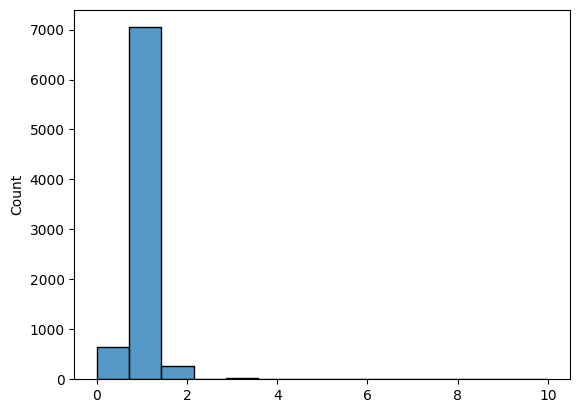

In [ ]:
genes_per_cell_62m = (adata_62m.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell_62m)